# Reinforcement Learning Solution to the Towers of Hanoi Puzzle

In [5]:
# Function to represent the state (of the pegs)
# state = [[1,2,3], [2,3,4], []]
from copy import deepcopy
def printState(state):
    statenew = deepcopy(state)
    for i in statenew:
        if len(i) == 0:
            i.insert(0, ' ')
            i.insert(0, ' ')
            i.insert(0, ' ')
        elif len(i) == 1:
            i.insert(0, ' ')
            i.insert(0, ' ')
        elif len(i) == 2:
            i.insert(0, ' ')

    for i in list(zip(*statenew)):
        for j in i:
            print(j, end=' ')
        print()
    print('-----')

In [6]:
# Function which returns valid moves from a state
def validMoves(state):
    valid = []
    for i in range(3):
        if state[i] == []:
            continue
        for j in range(3):
            if state[i] != state[j]:
                # Check if j is empty. If yes, then insert [i,j].
                if len(state[j]) == 0:
                    valid.append([i+1,j+1])
                # Else, check if disc in peg j is greater than disc in peg i. If yes, then insert.
                else:
                    if state[j][0] > state[i][0]:
                        valid.append([i+1,j+1])
    return valid

In [7]:
# Function to apply a move to a state and return the new state.
def makeMove(state, move):
    if move != None:
        state2 = deepcopy(state)
        # Get the pegs from and to which the moves are to be done.
        source = move[0]
        dest = move[1]
        # Get the disk from source
        disk = state2[source - 1][0]
        # Remove from source
        state2[source-1].remove(disk)
        # Move disk to destination
        state2[dest - 1].insert(0, disk)
        return state2

In [8]:
# Function to check if the goal state has been reached.
def isGoalState(state):
    if state == [[], [], [1,2,3]]:
        return True
    else:
        return False

In [9]:
# Function which converts lists to tuples.
def stateMoveTuple(state, move):
    stateTuple = tuple(tuple(x) for x in state)
    moveTuple = tuple(move)
    stateMoveTuple = (stateTuple, moveTuple)
    return stateMoveTuple

In [10]:
import random
# Epsilon Greedy
def epsilonGreedy(epsilon, Q, state):
    valid = validMoves(state)
    qlist = []
    if np.random.uniform() < epsilon:
        # Random Move
        return random.choice(valid)
    else:
        # Greedy Move - get action for which the Q value is maximum.
        # Get Q values for all (state, move) pairs and store in a list.
        for move in valid:
            smt = stateMoveTuple(state, move)
            Qval = Q.get(smt, -1) # Assign -1 if not in tuple (default Q value)
            qlist.append((Qval, move))
        maxMove = max(qlist, key=lambda x:x[0])
        return maxMove[1]

In [25]:
import numpy as np
# Function for training Q for Towers of Hanoi.
def trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF):
    epsilon = 1.0
    Q = {}
    stepsToGoal = []
    for nGames in range(nRepetitions):
        # Decay epsilon
        epsilon *= epsilonDecayFactor

        # Start state for ToH
        s = [[1,2,3], [], []]

        # Play a game till solution occurs for ToH.
        done = False
        step = 0
        while not done:        
            step += 1


            # Choose a move.
            move = epsilonGreedy(epsilon, Q, s)


            # Apply the move on a copy of state.
            sNew = deepcopy(s)
            sNew = makeMoveF(sNew, move)

            if stateMoveTuple(s, move) not in Q:
                Q[stateMoveTuple(s, move)] = -1  # initial Q value for new board,move

            # If the goal state is reached, then update Q(s, move) += rho*(0 - Q(s, move)) and break game (inner loop).

            if isGoalState(sNew):
                Q[stateMoveTuple(s, move)] = -1
                done = True

            else:
                if step > 1:
                    Q[stateMoveTuple(sOld,moveOld)] += learningRate * (-1 + Q[stateMoveTuple(s,move)] - Q[stateMoveTuple(sOld,moveOld)])
                sOld, moveOld = s, move # remember board and move to Q(board,move) can be updated after next steps
                s = sNew
        stepsToGoal.append(step)

    return Q, stepsToGoal

In [26]:
# Function testQ
def testQ(Q, maxSteps, validMovesF, makeMoveF):
    path = []
    s = [[1,2,3], [], []]
    path.append(s)
    print()
    steps = 0
    flag = 0
    while steps < maxSteps:        
        # Choose greedy move.
        move = epsilonGreedy(-1, Q, s)

        # Apply the move on the state.
        s = makeMoveF(s, move)
        path.append(s)

        # If the goal state is reached.
        if isGoalState(s):
            flag = 1
            break
        steps += 1
    if flag == 0:
        return "No goal found."
    return path

# Examples

In [27]:
state = [[1, 2, 3], [], []]
printState(state)

1     
2     
3     
-----


In [28]:
move =[1, 2]

stateMoveTuple(state, move)

(((1, 2, 3), (), ()), (1, 2))

In [29]:
newstate = makeMove(state, move)
newstate

[[2, 3], [1], []]

In [30]:
printState(newstate)

      
2     
3 1   
-----


In [31]:
Q, stepsToGoal = trainQ(50, 0.5, 0.7, validMoves, makeMove)

In [33]:
print(stepsToGoal)

[32, 96, 121, 33, 39, 40, 27, 45, 28, 22, 14, 7, 27, 10, 13, 9, 7, 10, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


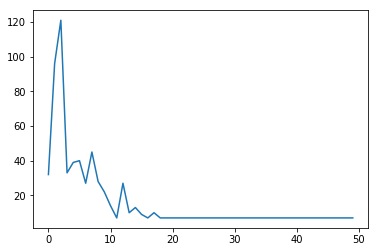

In [34]:
import matplotlib.pyplot as plt
plt.plot(stepsToGoal)
plt.show()

In [35]:
path = testQ(Q, 20, validMoves, makeMove)

In [36]:
path

[[[1, 2, 3], [], []],
 [[2, 3], [], [1]],
 [[3], [2], [1]],
 [[3], [1, 2], []],
 [[], [1, 2], [3]],
 [[1], [2], [3]],
 [[1], [], [2, 3]],
 [[], [], [1, 2, 3]]]

In [37]:
for s in path:
    printState(s)
    print()

1     
2     
3     
-----

      
2     
3   1 
-----

      
      
3 2 1 
-----

      
  1   
3 2   
-----

      
  1   
  2 3 
-----

      
      
1 2 3 
-----

      
    2 
1   3 
-----

    1 
    2 
    3 
-----



## Grading

Download and extract `A5grader.py` from [A5grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A5grader.tar).

In [23]:
%run -i A5grader.py


Testing validMoves([[1], [2], [3]])

--- 10/10 points. Correctly returned [[1, 2], [1, 3], [2, 3]]

Testing validMoves([[], [], [1, 2, 3]])

--- 10/10 points. Correctly returned [[3, 1], [3, 2]]

Testing makeMove([[], [], [1, 2, 3]], [3, 2])

--- 10/10 points. Correctly returned [[], [1], [2, 3]]

Testing makeMove([[2], [3], [1]], [1, 2])

--- 10/10 points. Correctly returned [[], [2, 3], [1]]

Testing   Q, steps = trainQ(1000, 0.5, 0.7, validMoves, makeMove).

--- 10/10 points. Q dictionary has correct number of entries.

--- 10/10 points. The mean of the number of steps is 7.394 which is correct.

Testing   path = testQ(Q, 20, validMoves, makeMove).


--- 20/20 points. Correctly returns path of length 8, less than 10.

C:\Users\Vignesh\Documents\Colorado State University\Courses\CS440 - Introduction to Artificial Intelligence - Chuck Anderson\Assignments Execution Grade is 80/80

 Remaining 20 points will be based on your text describing the trainQ and test! functions.

C:\Users\Vig

## Extra Credit

Modify your code to solve the Towers of Hanoi puzzle with 4 disks instead of 3.  Name your functions

    - printState_4disk
    - validMoves_4disk
    - makeMove_4disk

Find values for number of repetitions, learning rate, and epsilon decay factor for which trainQ learns a Q function that testQ can use to find the shortest solution path.  Include the output from the successful calls to trainQ and testQ.

In [24]:
# Function to represent the state (of the pegs)
# state = [[1,2,3,4], [], []]
from copy import deepcopy
def printState_4disk(state):
	statenew = deepcopy(state)
	for i in statenew:
		if len(i) == 0:
			i.insert(0, ' ')
			i.insert(0, ' ')
			i.insert(0, ' ')
			i.insert(0, ' ')
		elif len(i) == 1:
			i.insert(0, ' ')
			i.insert(0, ' ')
			i.insert(0, ' ')
		elif len(i) == 2:
			i.insert(0, ' ')
			i.insert(0, ' ')
		elif len(i) == 3:
			i.insert(0, ' ')

	for i in list(zip(*statenew)):
		for j in i:
			print(j, end=' ')
		print()
	print('-----')

# Function which returns valid moves from a state
def validMoves_4disk(state):
	valid = []
	for i in range(3):
		if state[i] == []:
			continue
		for j in range(3):
			if state[i] != state[j]:
				# Check if j is empty. If yes, then insert [i,j].
				if len(state[j]) == 0:
					valid.append([i+1,j+1])
				# Else, check if disc in peg j is greater than disc in peg i. If yes, then insert.
				else:
					if state[j][0] > state[i][0]:
						valid.append([i+1,j+1])
	return valid

# Function to apply a move to a state and return the new state.
def makeMove_4disk(state, move):
	if move != None:
		state2 = deepcopy(state)
		# Get the pegs from and to which the moves are to be done.
		source = move[0]
		dest = move[1]
		# Get the disk from source
		disk = state2[source - 1][0]
		# Remove from source
		state2[source-1].remove(disk)
		# Move disk to destination
		state2[dest - 1].insert(0, disk)
		return state2

# Function to check if the goal state has been reached.
def isGoalState_4disk(state):
	if state == [[], [], [1,2,3,4]]:
		return True
	else:
		return False

# Function which converts lists to tuples.
def stateMoveTuple(state, move):
	stateTuple = tuple(tuple(x) for x in state)
	moveTuple = tuple(move)
	stateMoveTuple = (stateTuple, moveTuple)
	return stateMoveTuple

import pprint
import random
# Epsilon Greedy
def epsilonGreedy_4disk(epsilon, Q, state):
    valid = validMoves_4disk(state)
    qlist = []
    if np.random.uniform() < epsilon:
            return random.choice(valid)
    else:
        # Greedy Move - get action for which the Q value is maximum.
        # Get Q values for all (state, move) pairs and store in a list.
        for move in valid:
        	smt = stateMoveTuple(state, move)
        	Qval = Q.get(smt, -1)
        	qlist.append((Qval, move))
        maxMove = max(qlist, key=lambda x:x[0])
        return maxMove[1]

# Function testQ
# Function testQ
def testQ(Q, maxSteps, validMovesF, makeMoveF):
    path = []
    s = [[1,2,3,4], [], []]
    path.append(s)
    print()
    steps = 0
    flag = 0
    while steps < maxSteps:        
        # Choose greedy move.
        move = epsilonGreedy_4disk(-1, Q, s)

        # Apply the move on the state.
        s = makeMoveF(s, move)
        path.append(s)

        # If the goal state is reached.
        if isGoalState_4disk(s):
            flag = 1
            break
        steps += 1
    if flag == 0:
        return "No goal found."
    return path


import numpy as np

# Function for training Q for Towers of Hanoi.
def trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF):
	epsilon = 1.0
	Q = {}
	stepsToGoal = []
	for nGames in range(nRepetitions):
	    # Decay epsilon
	    epsilon *= epsilonDecayFactor

	    # Start state for ToH
	    s = [[1,2,3,4], [], []]

	    # Play a game till solution occurs for ToH.
	    done = False
	    step = 0
	    while not done:        
	        step += 1

	        # Choose a move.
	        move = epsilonGreedy_4disk(epsilon, Q, s)

	        # Apply the move on a copy of state.
	        sNew = deepcopy(s)
	        sNew = makeMoveF(sNew, move)

	        if stateMoveTuple(s, move) not in Q:
	            Q[stateMoveTuple(s, move)] = -1  # initial Q value for new board,move

            # If the goal state is reached, then update Q(s, move) += rho*(0 - Q(s, move)) and break game (inner loop).
	            
	        if isGoalState_4disk(sNew):
	            Q[stateMoveTuple(s, move)] = -1
	            done = True
	            
	        else:
	            if step > 1:
	                Q[stateMoveTuple(sOld,moveOld)] += learningRate * (-1 + Q[stateMoveTuple(s,move)] - Q[stateMoveTuple(sOld,moveOld)])
	            sOld, moveOld = s, move # remember board and move to Q(board,move) can be updated after next steps
	            s = sNew
	    stepsToGoal.append(step)

	return Q, stepsToGoal


import operator
import pprint

import os
if __name__ == '__main__':

	#state = [[3,4], [1,2], []]
	#printState_4disk(state)	
	#print(validMoves_4disk(state))
	#st = makeMove_4disk(state, [2,3])
	#printState_4disk(st)

	Q, steps = trainQ(50, 0.5, 0.7, validMoves_4disk, makeMove_4disk)

	print(testQ(Q, 20, validMoves_4disk, makeMove_4disk))
	#sorted_x = sorted(Q.items(), key=operator.itemgetter(1))
	#pprint.pprint(sorted_x)

